# 3. Particles: Get Sub-Regions of Loaded the Data

## Load the Data

In [1]:
using Mera, PyPlot
info = getinfo(400, "../../testing/simulations/manu_sim_sf_L14");
particles = getparticles(info, :mass); 

[Mera]: 2020-02-12T20:28:59.093

Code: RAMSES
output [400] summary:
mtime: 2018-09-05T09:51:55.041
ctime: 2019-11-01T17:35:21.051
simulation time: 594.98 [Myr]
boxlen: 48.0 [kpc]
ncpu: 2048
ndim: 3
-------------------------------------------------------
amr:           true
level(s): 6 - 14 --> cellsize(s): 750.0 [pc] - 2.93 [pc]
-------------------------------------------------------
hydro:         true
hydro-variables:  7  --> (:rho, :vx, :vy, :vz, :p, :var6, :var7)
hydro-descriptor: (:density, :velocity_x, :velocity_y, :velocity_z, :thermal_pressure, :passive_scalar_1, :passive_scalar_2)
γ: 1.6667
-------------------------------------------------------
gravity:       true
gravity-variables: (:epot, :ax, :ay, :az)
-------------------------------------------------------
particles:     true
- Npart:    5.091500e+05 
- Nstars:   5.066030e+05 
- Ndm:      2.547000e+03 
particle variables: (:vx, :vy, :vz, :mass, :birth)
-------------------------------------------------------
clumps:       

Reading data...100%|████████████████████████████████████| Time: 0:00:04


Found 5.089390e+05 particles
Memory used for data table :19.4152889251709 MB
-------------------------------------------------------



## Cuboid Region

### Create projections of the full box:

In [2]:
proj_z = projection(particles, :sd, unit=:Msol_pc2, center=[:boxcenter], direction=:z, lmax=8, verbose=false);
proj_y = projection(particles, :sd, unit=:Msol_pc2, center=[:boxcenter], direction=:y, lmax=8, verbose=false);
proj_x = projection(particles, :sd, unit=:Msol_pc2, center=[:boxcenter], direction=:x, lmax=8, verbose=false);

The generated objects include, e.g. the extent of the processed domain, that can be used to declare the specific range of the plots, while the field cextent gives the extent related to a given center (default: [0.,0.,0.]).

In [3]:
propertynames(proj_z)

(:maps, :maps_unit, :maps_lmax, :maps_mode, :lmax_projected, :lmin, :lmax, :ref_time, :ranges, :extent, :cextent, :ratio, :boxlen, :scale, :info)

#### Cuboid Region: The red lines show the region that we want to cutout as a sub-region from the full data:

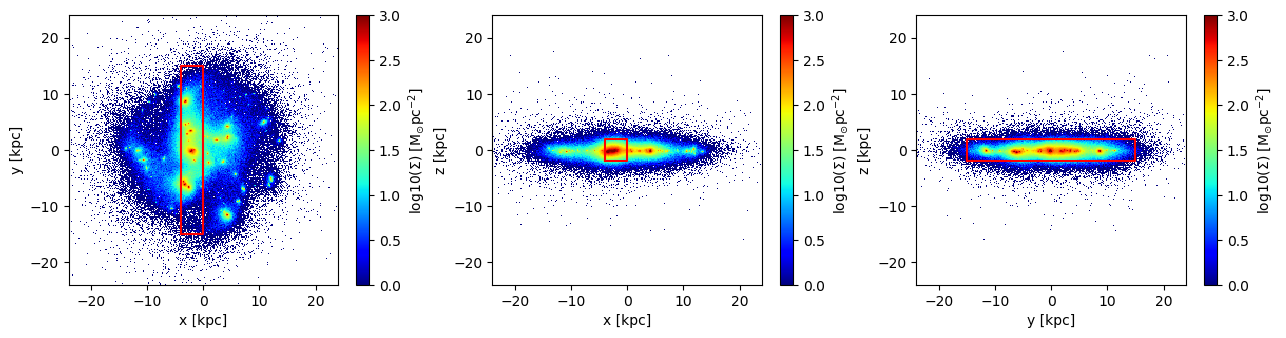

In [4]:
figure(figsize=(15.5, 3.5))
labeltext = L"\mathrm{log10(\Sigma) \ [M_{\odot} pc^{-2}]}"

subplot(1,3,1)
im = imshow( log10.( permutedims(proj_z.maps[:sd]) ), cmap="jet", aspect=proj_z.ratio, origin="lower", extent=proj_z.cextent, vmin=0, vmax=3)
plot([-4.,0.,0.,-4.,-4.],[-15.,-15.,15.,15.,-15.], color="red")
xlabel("x [kpc]")
ylabel("y [kpc]")
cb = colorbar(im, label=labeltext)

subplot(1,3,2)
im = imshow( log10.( permutedims(proj_y.maps[:sd]) ), cmap="jet", aspect=proj_y.ratio, origin="lower", extent=proj_y.cextent, vmin=0, vmax=3)
plot([-4.,0.,0.,-4.,-4.],[-2.,-2.,2.,2.,-2.], color="red")
xlabel("x [kpc]")
ylabel("z [kpc]")
cb = colorbar(im, label=labeltext)

subplot(1,3,3)
im = imshow( log10.( permutedims(proj_x.maps[:sd]) ), cmap="jet", aspect=proj_x.ratio, origin="lower", extent=proj_x.cextent, vmin=0, vmax=3)
plot([-15.,15.,15.,-15.,-15.],[-2.,-2.,2.,2.,-2.], color="red")
xlabel("y [kpc]")
ylabel("z [kpc]")
cb = colorbar(im, label=labeltext);

#### Cuboid Region: Cutout the data assigned to the object `particles`

Note: The selected regions can be given relative to a user given center or to the box corner [0., 0., 0.] by default. The user can choose between standard notation [0:1] (default) or physical length-units, defined in e.g. info.scale :

In [5]:
part_subregion = subregion( particles, :cuboid,
                                    xrange=[-4., 0.], 
                                    yrange=[-15. ,15.], 
                                    zrange=[-2. ,2.],
                                    center=[:boxcenter],
                                    range_unit=:kpc );

[Mera]: 2020-02-12T20:17:06.008

center: [0.5, 0.5, 0.5] ==> [24.0 [kpc] :: 24.0 [kpc] :: 24.0 [kpc]]

domain:
xmin::xmax: 0.4166667 :: 0.5  	==> 20.0 [kpc] :: 24.0 [kpc]
ymin::ymax: 0.1875 :: 0.8125  	==> 9.0 [kpc] :: 39.0 [kpc]
zmin::zmax: 0.4583333 :: 0.5416667  	==> 22.0 [kpc] :: 26.0 [kpc]

Memory used for data table :10.259977340698242 MB
-------------------------------------------------------



The function `subregion` creates a new object with the same type as the object created by the function `getparticles` :

In [6]:
typeof(part_subregion)

PartDataType

#### Cuboid Region: Projections of the sub-region. 
The coordinates center is the center of the box:

In [9]:
proj_z = projection(part_subregion, :sd, unit=:Msol_pc2, center=[:boxcenter], direction=:z, lmax=10, verbose=false);
proj_y = projection(part_subregion, :sd, unit=:Msol_pc2, center=[:boxcenter], direction=:y, lmax=10, verbose=false);
proj_x = projection(part_subregion, :sd, unit=:Msol_pc2, center=[:boxcenter], direction=:x, lmax=10, verbose=false);

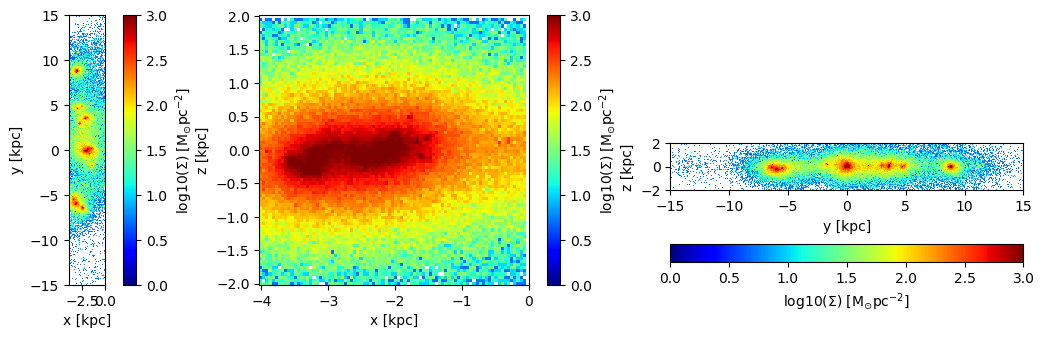

In [10]:
figure(figsize=(15.5, 3.5))
labeltext = L"\mathrm{log10(\Sigma) \ [M_{\odot} pc^{-2}]}"

subplot(1,3,1)
im = imshow( log10.( permutedims(proj_z.maps[:sd]) ), cmap="jet", origin="lower", extent=proj_z.cextent, vmin=0, vmax=3)
xlabel("x [kpc]")
ylabel("y [kpc]")
cb = colorbar(im, label=labeltext)

subplot(1,3,2)
im = imshow( log10.( permutedims(proj_y.maps[:sd]) ), cmap="jet", origin="lower", extent=proj_y.cextent, vmin=0, vmax=3)
xlabel("x [kpc]")
ylabel("z [kpc]")
cb = colorbar(im, label=labeltext) 

subplot(1,3,3)
im = imshow( log10.( permutedims(proj_x.maps[:sd]) ), cmap="jet", origin="lower", extent=proj_x.cextent, vmin=0, vmax=3)
xlabel("y [kpc]")
ylabel("z [kpc]")
cb = colorbar(im, orientation="horizontal", label=labeltext, pad=0.2);

#### Cuboid Region: Get the data outside of the selected region (inverse selection):

In [11]:
part_subregion = subregion( particles, :cuboid, 
                                    xrange=[-4., 0.], 
                                    yrange=[-15. ,15.], 
                                    zrange=[-2. ,2.],
                                    center=[24.,24.,24.],
                                    range_unit=:kpc,
                                    inverse=true);

[Mera]: 2020-02-12T20:17:22.042

center: [0.5, 0.5, 0.5] ==> [24.0 [kpc] :: 24.0 [kpc] :: 24.0 [kpc]]

domain:
xmin::xmax: 0.4166667 :: 0.5  	==> 20.0 [kpc] :: 24.0 [kpc]
ymin::ymax: 0.1875 :: 0.8125  	==> 9.0 [kpc] :: 39.0 [kpc]
zmin::zmax: 0.4583333 :: 0.5416667  	==> 22.0 [kpc] :: 26.0 [kpc]

Memory used for data table :9.156118392944336 MB
-------------------------------------------------------



In [12]:
proj_z = projection(part_subregion, :sd, unit=:Msol_pc2, center=[:boxcenter], direction=:z, lmax=8, verbose=false);
proj_y = projection(part_subregion, :sd, unit=:Msol_pc2, center=[:boxcenter], direction=:y, lmax=8, verbose=false);
proj_x = projection(part_subregion, :sd, unit=:Msol_pc2, center=[:boxcenter], direction=:x, lmax=8, verbose=false);

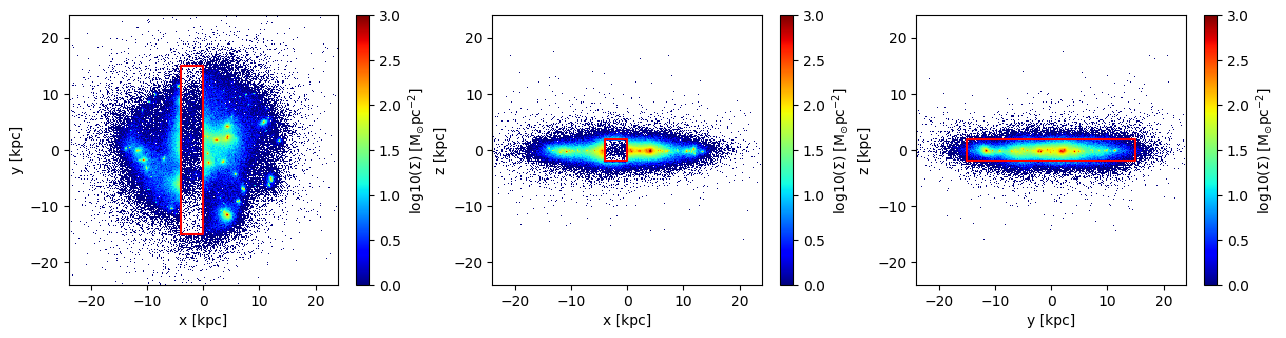

In [13]:
figure(figsize=(15.5, 3.5))
labeltext = L"\mathrm{log10(\Sigma) \ [M_{\odot} pc^{-2}]}"

subplot(1,3,1)
im = imshow( log10.( permutedims(proj_z.maps[:sd]) ), cmap="jet", aspect=proj_z.ratio, origin="lower", extent=proj_z.cextent, vmin=0, vmax=3)
plot([-4.,0.,0.,-4.,-4.],[-15.,-15.,15.,15.,-15.], color="red")
xlabel("x [kpc]")
ylabel("y [kpc]")
cb = colorbar(im, label=labeltext)

subplot(1,3,2)
im = imshow( log10.( permutedims(proj_y.maps[:sd]) ), cmap="jet", aspect=proj_y.ratio, origin="lower", extent=proj_y.cextent, vmin=0, vmax=3)
plot([-4.,0.,0.,-4.,-4.],[-2.,-2.,2.,2.,-2.], color="red")
xlabel("x [kpc]")
ylabel("z [kpc]")
cb = colorbar(im, label=labeltext)

subplot(1,3,3)
im = imshow( log10.( permutedims(proj_x.maps[:sd]) ), cmap="jet", aspect=proj_x.ratio, origin="lower", extent=proj_x.cextent, vmin=0, vmax=3)
plot([-15.,15.,15.,-15.,-15.],[-2.,-2.,2.,2.,-2.], color="red")
xlabel("y [kpc]")
ylabel("z [kpc]")
cb = colorbar(im, label=labeltext);

## Cylindrical Region
#### Create projections of the full box:

In [14]:
proj_z = projection(particles, :sd, unit=:Msol_pc2, center=[:boxcenter], direction=:z, lmax=8, verbose=false);
proj_y = projection(particles, :sd, unit=:Msol_pc2, center=[:boxcenter], direction=:y, lmax=8, verbose=false);
proj_x = projection(particles, :sd, unit=:Msol_pc2, center=[:boxcenter], direction=:x, lmax=8, verbose=false);

#### Cylindrical Region: The red lines show the region that we want to cutout as a sub-region from the full data:

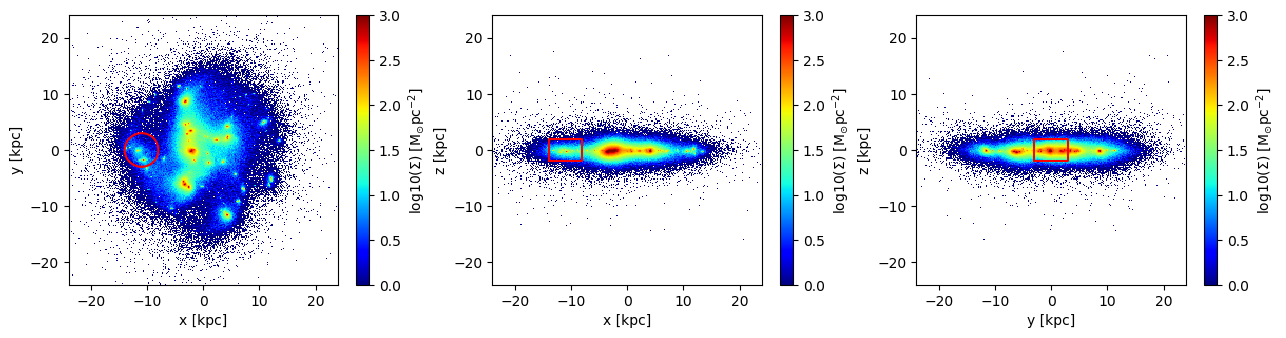

In [15]:
figure(figsize=(15.5, 3.5))
labeltext = L"\mathrm{log10(\Sigma) \ [M_{\odot} pc^{-2}]}"
theta = range(-pi, stop=pi, length=100)

subplot(1,3,1)
im = imshow( log10.( permutedims(proj_z.maps[:sd]) ), cmap="jet", aspect=proj_z.ratio, origin="lower", extent=proj_z.cextent, vmin=0, vmax=3)
plot( 3. .* sin.(theta) .-11, 3 .* cos.(theta), color="red")
xlabel("x [kpc]")
ylabel("y [kpc]")
cb = colorbar(im, label=labeltext)

subplot(1,3,2)
im = imshow( log10.( permutedims(proj_y.maps[:sd]) ), cmap="jet", origin="lower", extent=proj_y.cextent, vmin=0, vmax=3)
plot([-3.,3.,3.,-3.,-3.] .-11.,[-2.,-2.,2.,2.,-2.], color="red")
xlabel("x [kpc]")
ylabel("z [kpc]")
cb = colorbar(im, label=labeltext)

subplot(1,3,3)
im = imshow( log10.( permutedims(proj_x.maps[:sd]) ), cmap="jet", origin="lower", extent=proj_x.cextent, vmin=0, vmax=3)
plot([-3.,3.,3.,-3.,-3.],[-2.,-2.,2.,2.,-2.], color="red")
xlabel("y [kpc]")
ylabel("z [kpc]")
cb = colorbar(im, label=labeltext);

#### Cylindrical Region: Cutout the data assigned to the object `particles`
Select the ranges of the cylinder in the unit "kpc", relative to the given center [13., 24., 24.]. The height refers to both z-directions from the plane.

In [2]:
part_subregion = subregion(particles, :cylinder,
                            radius=3.,
                            height=2.,
                            range_unit=:kpc, 
                            center=[13.,:bc,:bc],
                            direction=:z);

[Mera]: 2020-02-12T20:29:21.058

center: [0.2708333, 0.5, 0.5] ==> [13.0 [kpc] :: 24.0 [kpc] :: 24.0 [kpc]]

domain:
xmin::xmax: 0.2083333 :: 0.3333333  	==> 10.0 [kpc] :: 16.0 [kpc]
ymin::ymax: 0.4375 :: 0.5625  	==> 21.0 [kpc] :: 27.0 [kpc]
zmin::zmax: 0.4583333 :: 0.5416667  	==> 22.0 [kpc] :: 26.0 [kpc]

Radius: 3.0 [kpc]
Height: 2.0 [kpc]
Memory used for data table :578.951171875 KB
-------------------------------------------------------



#### Cylindrical Region: Projections of the sub-region. 
The coordinates center is the center of the box:

In [29]:
proj_z = projection(part_subregion, :sd, unit=:Msol_pc2, center=[:boxcenter], direction=:z, lmax=10, verbose=false);
proj_y = projection(part_subregion, :sd, unit=:Msol_pc2, center=[:boxcenter], direction=:y, lmax=10, verbose=false);
proj_x = projection(part_subregion, :sd, unit=:Msol_pc2, center=[:boxcenter], direction=:x, lmax=10, verbose=false);

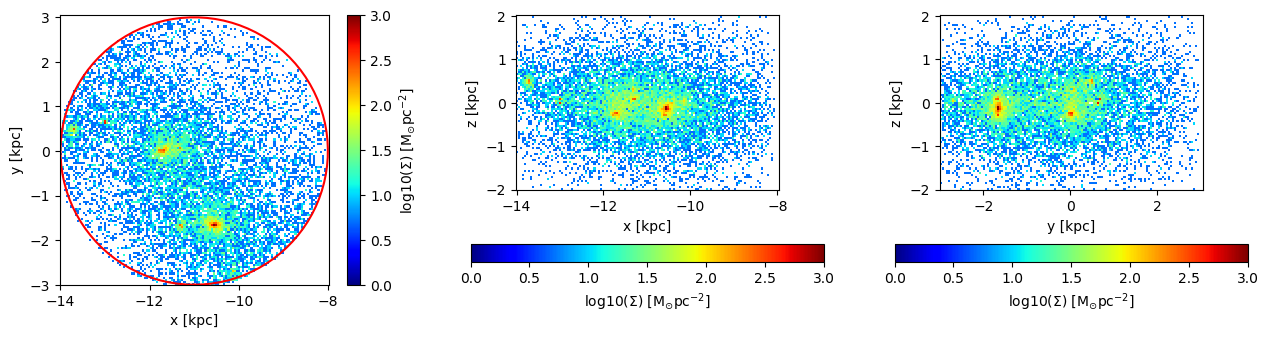

In [30]:
figure(figsize=(15.5, 3.5))
labeltext = L"\mathrm{log10(\Sigma) \ [M_{\odot} pc^{-2}]}"
theta = range(-pi, stop=pi, length=100)

subplot(1,3,1)
im = imshow( log10.( permutedims(proj_z.maps[:sd]) ), cmap="jet", aspect=proj_z.ratio, origin="lower", extent=proj_z.cextent, vmin=0, vmax=3)
plot( 3. .* sin.(theta) .-11, 3 .* cos.(theta), color="red")
xlabel("x [kpc]")
ylabel("y [kpc]")
cb = colorbar(im, label=labeltext)

subplot(1,3,2)
im = imshow( log10.( permutedims(proj_y.maps[:sd]) ), cmap="jet", origin="lower", extent=proj_y.cextent, vmin=0, vmax=3)

xlabel("x [kpc]")
ylabel("z [kpc]")
cb = colorbar(im, orientation="horizontal", label=labeltext, pad=0.2);

subplot(1,3,3)
im = imshow( log10.( permutedims(proj_x.maps[:sd]) ), cmap="jet", origin="lower", extent=proj_x.cextent, vmin=0, vmax=3)

xlabel("y [kpc]")
ylabel("z [kpc]")
cb = colorbar(im, orientation="horizontal", label=labeltext, pad=0.2);

#### Cylindrical Region: Projections of the sub-region py passing a different center:

In [3]:
proj_z = projection(part_subregion, :sd, unit=:Msol_pc2, direction=:z, center=[13., 24.,24.], range_unit=:kpc, lmax=10, verbose=false);
proj_y = projection(part_subregion, :sd, unit=:Msol_pc2, direction=:y, center=[13., 24.,24.], range_unit=:kpc, lmax=10, verbose=false);
proj_x = projection(part_subregion, :sd, unit=:Msol_pc2, direction=:x, center=[13., 24.,24.], range_unit=:kpc, lmax=10, verbose=false);

#### The ranges of the plots are now adapted to the given data center:

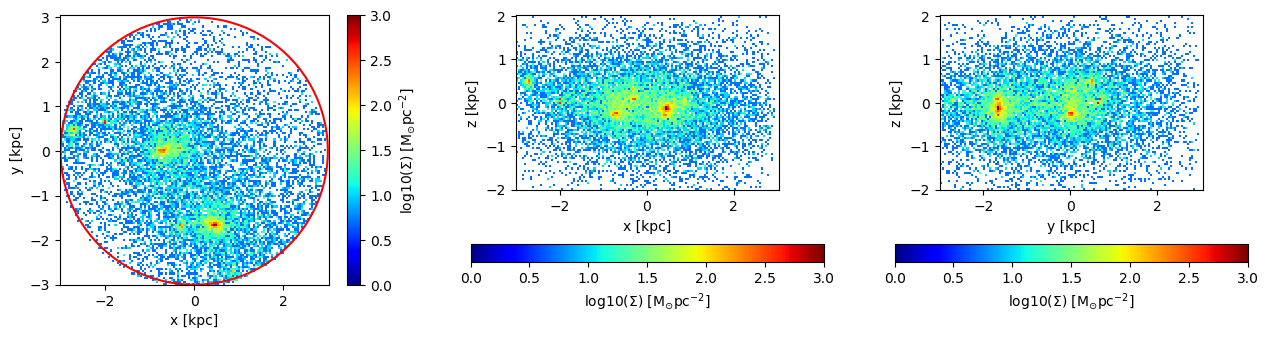

In [4]:
figure(figsize=(15.5, 3.5))
labeltext=L"\mathrm{log10(\Sigma) \ [M_{\odot} pc^{-2}]}"
theta = range(-pi, stop=pi, length=100)

subplot(1,3,1)
im = imshow( log10.( permutedims(proj_z.maps[:sd]) ), cmap="jet", aspect=proj_z.ratio, origin="lower", extent=proj_z.cextent, vmin=0, vmax=3)
plot( 3. .* sin.(theta), 3 .* cos.(theta), color="red")
xlabel("x [kpc]")
ylabel("y [kpc]")
cb = colorbar(im, label=labeltext)

subplot(1,3,2)
im = imshow( log10.( permutedims(proj_y.maps[:sd]) ), cmap="jet", origin="lower", extent=proj_y.cextent, vmin=0, vmax=3)
xlabel("x [kpc]")
ylabel("z [kpc]")
cb = colorbar(im, orientation="horizontal", label=labeltext, pad=0.2);

subplot(1,3,3)
im = imshow( log10.( permutedims(proj_x.maps[:sd]) ), cmap="jet", origin="lower", extent=proj_x.cextent, vmin=0, vmax=3)
xlabel("y [kpc]")
ylabel("z [kpc]")
cb = colorbar(im, orientation="horizontal", label=labeltext, pad=0.2);

#### Cylindrical Region: Get the data outside of the selected region (inverse selection):

In [33]:
part_subregion = subregion(particles, :cylinder,
                                    radius=3.,
                                    height=2.,
                                    range_unit=:kpc, 
                                    center=[ (24. -11.),:bc,:bc],
                                    direction=:z,
                                    inverse=true);

[Mera]: 2020-02-12T20:19:47.994

center: [0.2708333, 0.5, 0.5] ==> [13.0 [kpc] :: 24.0 [kpc] :: 24.0 [kpc]]

domain:
xmin::xmax: 0.2083333 :: 0.3333333  	==> 10.0 [kpc] :: 16.0 [kpc]
ymin::ymax: 0.4375 :: 0.5625  	==> 21.0 [kpc] :: 27.0 [kpc]
zmin::zmax: 0.4583333 :: 0.5416667  	==> 22.0 [kpc] :: 26.0 [kpc]

Radius: 3.0 [kpc]
Height: 2.0 [kpc]
Memory used for data table :18.8507137298584 MB
-------------------------------------------------------



In [34]:
proj_z = projection(part_subregion, :sd, unit=:Msol_pc2, center=[:boxcenter], direction=:z, lmax=8, verbose=false);
proj_y = projection(part_subregion, :sd, unit=:Msol_pc2, center=[:boxcenter], direction=:y, lmax=8, verbose=false);
proj_x = projection(part_subregion, :sd, unit=:Msol_pc2, center=[:boxcenter], direction=:x, lmax=8, verbose=false);

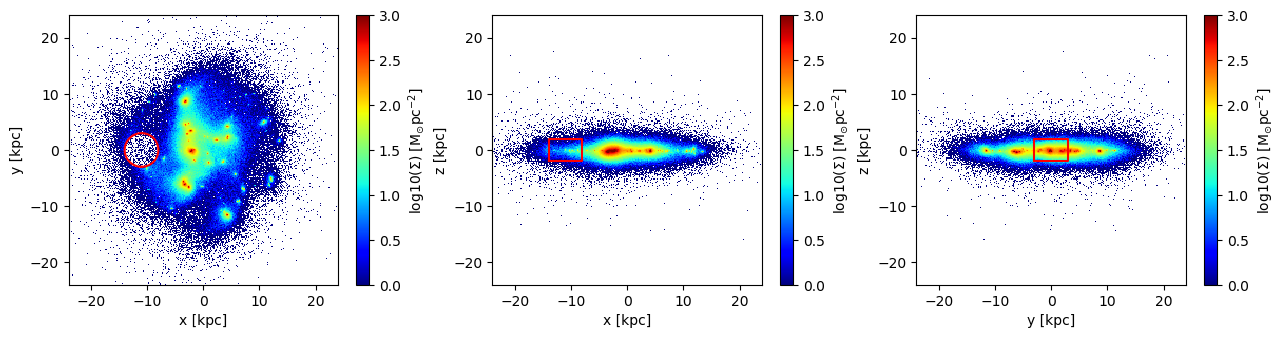

In [35]:
figure(figsize=(15.5, 3.5))
labeltext=L"\mathrm{log10(\Sigma) \ [M_{\odot} pc^{-2}]}"
theta = range(-pi, stop=pi, length=100)

subplot(1,3,1)
im = imshow( log10.( permutedims(proj_z.maps[:sd]) ), cmap="jet", aspect=proj_z.ratio, origin="lower", extent=proj_z.cextent, vmin=0, vmax=3)
plot( 3. .* sin.(theta) .-11, 3 .* cos.(theta), color="red")
xlabel("x [kpc]")
ylabel("y [kpc]")
cb = colorbar(im, label=labeltext)

subplot(1,3,2)
im = imshow( log10.( permutedims(proj_y.maps[:sd]) ), cmap="jet", aspect=proj_y.ratio, origin="lower", extent=proj_y.cextent, vmin=0, vmax=3)
plot([-3.,3.,3.,-3.,-3.] .-11.,[-2.,-2.,2.,2.,-2.], color="red")
xlabel("x [kpc]")
ylabel("z [kpc]")
cb = colorbar(im, label=labeltext) 

subplot(1,3,3)
im = imshow( log10.( permutedims(proj_x.maps[:sd]) ), cmap="jet", aspect=proj_x.ratio, origin="lower", extent=proj_x.cextent, vmin=0, vmax=3)
plot([-3.,3.,3.,-3.,-3.],[-2.,-2.,2.,2.,-2.], color="red")
xlabel("y [kpc]")
ylabel("z [kpc]")
cb = colorbar(im, label=labeltext);

## Spherical Region
### Create projections of the full box:

In [36]:
proj_z = projection(particles, :sd, unit=:Msol_pc2, center=[:boxcenter], direction=:z, lmax=8, verbose=false);
proj_y = projection(particles, :sd, unit=:Msol_pc2, center=[:boxcenter], direction=:y, lmax=8, verbose=false);
proj_x = projection(particles, :sd, unit=:Msol_pc2, center=[:boxcenter], direction=:x, lmax=8, verbose=false);

#### Spherical Region: The red lines show the region that we want to cutout as a sub-region from the full data:

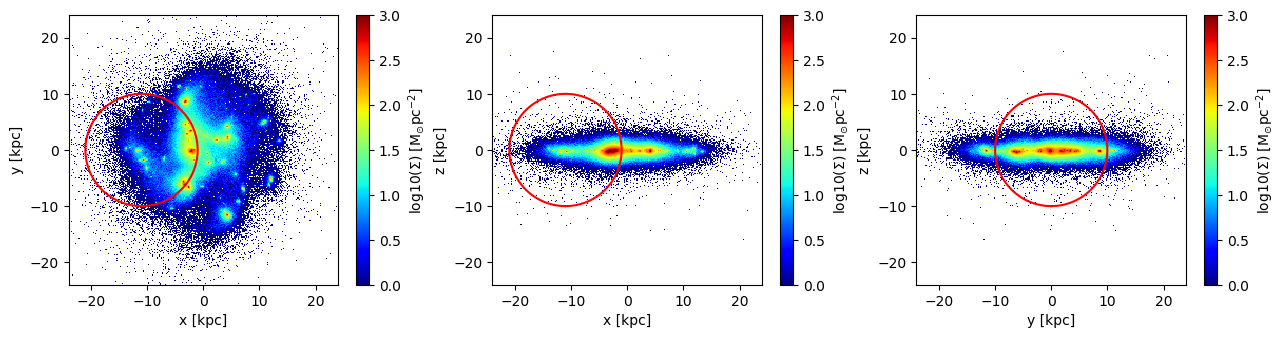

In [37]:
figure(figsize=(15.5, 3.5))
labeltext=L"\mathrm{log10(\Sigma) \ [M_{\odot} pc^{-2}]}"
theta = range(-pi, stop=pi, length=100)

subplot(1,3,1)
im = imshow( log10.( permutedims(proj_z.maps[:sd]) ), cmap="jet", aspect=proj_z.ratio, origin="lower", extent=proj_z.cextent, vmin=0, vmax=3)
plot( 10. .* sin.(theta) .-11., 10 .* cos.(theta), color="red")
xlabel("x [kpc]")
ylabel("y [kpc]")
cb = colorbar(im, label=labeltext)

subplot(1,3,2)
im = imshow( log10.( permutedims(proj_y.maps[:sd]) ), cmap="jet", aspect=proj_y.ratio, origin="lower", extent=proj_y.cextent, vmin=0, vmax=3)
plot( 10. .* sin.(theta) .-11., 10 .* cos.(theta), color="red")
xlabel("x [kpc]")
ylabel("z [kpc]")
cb = colorbar(im, label=labeltext) 

subplot(1,3,3)
im = imshow( log10.( permutedims(proj_x.maps[:sd]) ), cmap="jet", aspect=proj_x.ratio, origin="lower", extent=proj_x.cextent, vmin=0, vmax=3)
plot( 10. .* sin.(theta) , 10 .* cos.(theta), color="red")
xlabel("y [kpc]")
ylabel("z [kpc]")
cb = colorbar(im, label=labeltext);

#### Spherical Region: Cutout the data assigned to the object `particles`
Select the radius of the sphere in the unit "kpc", relative to the given center [13., 24., 24.]:

In [38]:
part_subregion = subregion( particles, :sphere, 
                            radius=10.,
                            range_unit=:kpc, 
                            center=[(24. -11.),24.,24.]);

[Mera]: 2020-02-12T20:20:08.93

center: [0.2708333, 0.5, 0.5] ==> [13.0 [kpc] :: 24.0 [kpc] :: 24.0 [kpc]]

domain:
xmin::xmax: 0.0625 :: 0.4791667  	==> 3.0 [kpc] :: 23.0 [kpc]
ymin::ymax: 0.2916667 :: 0.7083333  	==> 14.0 [kpc] :: 34.0 [kpc]
zmin::zmax: 0.2916667 :: 0.7083333  	==> 14.0 [kpc] :: 34.0 [kpc]

Radius: 10.0 [kpc]
Memory used for data table :8.807950973510742 MB
-------------------------------------------------------



#### Spherical Region: Projections of the sub-region. 
The coordinates center is the center of the box:

In [39]:
proj_z = projection(part_subregion, :sd, unit=:Msol_pc2, center=[:boxcenter], direction=:z, lmax=8, verbose=false);
proj_y = projection(part_subregion, :sd, unit=:Msol_pc2, center=[:boxcenter], direction=:y, lmax=8, verbose=false);
proj_x = projection(part_subregion, :sd, unit=:Msol_pc2, center=[:boxcenter], direction=:x, lmax=8, verbose=false);

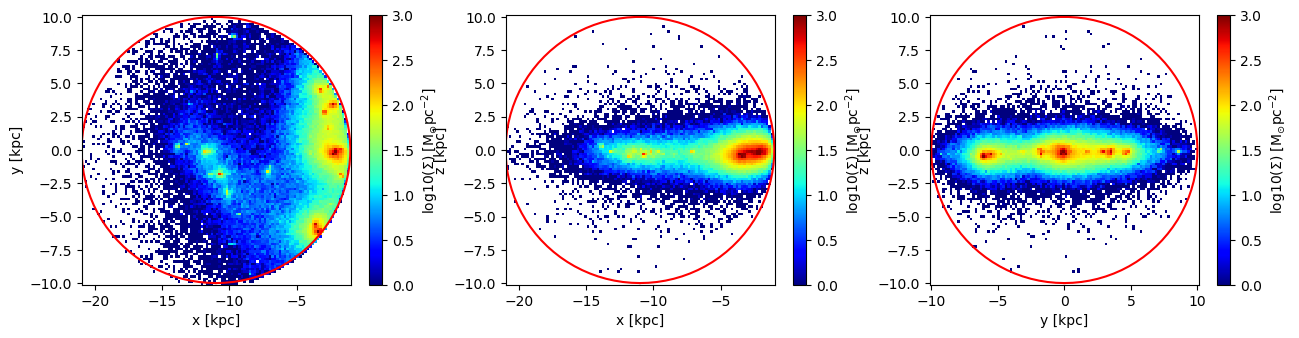

In [40]:
figure(figsize=(15.5, 3.5))
labeltext=L"\mathrm{log10(\Sigma) \ [M_{\odot} pc^{-2}]}"
theta = range(-pi, stop=pi, length=100)

subplot(1,3,1)
im = imshow( log10.( permutedims(proj_z.maps[:sd]) ), cmap="jet", aspect=proj_z.ratio, origin="lower", extent=proj_z.cextent, vmin=0, vmax=3)
plot( 10. .* sin.(theta) .-11., 10 .* cos.(theta), color="red")
xlabel("x [kpc]")
ylabel("y [kpc]")
cb = colorbar(im, label=labeltext)

subplot(1,3,2)
im = imshow( log10.( permutedims(proj_y.maps[:sd]) ), cmap="jet", aspect=proj_y.ratio, origin="lower", extent=proj_y.cextent, vmin=0, vmax=3)
plot( 10. .* sin.(theta) .-11., 10 .* cos.(theta), color="red")
xlabel("x [kpc]")
ylabel("z [kpc]")
cb = colorbar(im, label=labeltext) 

subplot(1,3,3)
im = imshow( log10.( permutedims(proj_x.maps[:sd]) ), cmap="jet", aspect=proj_x.ratio, origin="lower", extent=proj_x.cextent, vmin=0, vmax=3)
plot( 10. .* sin.(theta) , 10 .* cos.(theta), color="red")
xlabel("y [kpc]")
ylabel("z [kpc]")
cb = colorbar(im, label=labeltext);

#### Spherical Region: Get the data outside of the selected region (inverse selection):

In [41]:
part_subregion = subregion( particles, :sphere,
                            radius=10.,
                            range_unit=:kpc, 
                            center=[(24. -11.),24.,24.], 
                            inverse=true);

[Mera]: 2020-02-12T20:20:22.215

center: [0.2708333, 0.5, 0.5] ==> [13.0 [kpc] :: 24.0 [kpc] :: 24.0 [kpc]]

domain:
xmin::xmax: 0.0625 :: 0.4791667  	==> 3.0 [kpc] :: 23.0 [kpc]
ymin::ymax: 0.2916667 :: 0.7083333  	==> 14.0 [kpc] :: 34.0 [kpc]
zmin::zmax: 0.2916667 :: 0.7083333  	==> 14.0 [kpc] :: 34.0 [kpc]

Radius: 10.0 [kpc]
Memory used for data table :10.608144760131836 MB
-------------------------------------------------------



In [42]:
proj_z = projection(part_subregion, :sd, unit=:Msol_pc2, center=[:boxcenter], direction=:z, lmax=8, verbose=false);
proj_y = projection(part_subregion, :sd, unit=:Msol_pc2, center=[:boxcenter], direction=:y, lmax=8, verbose=false);
proj_x = projection(part_subregion, :sd, unit=:Msol_pc2, center=[:boxcenter], direction=:x, lmax=8, verbose=false);

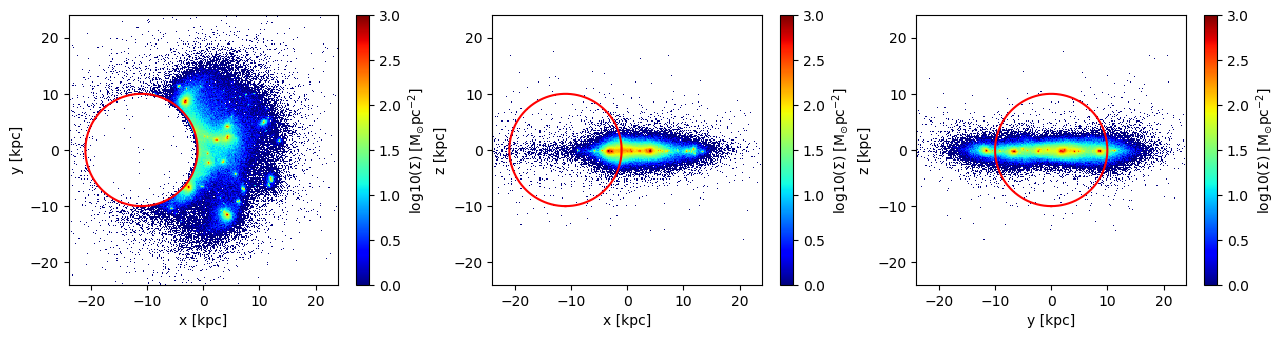

In [43]:
figure(figsize=(15.5, 3.5))
labeltext=L"\mathrm{log10(\Sigma) \ [M_{\odot} pc^{-2}]}"
theta = range(-pi, stop=pi, length=100)

subplot(1,3,1)
im = imshow( log10.( permutedims(proj_z.maps[:sd]) ), cmap="jet", aspect=proj_z.ratio, origin="lower", extent=proj_z.cextent, vmin=0, vmax=3)
plot( 10. .* sin.(theta) .-11., 10 .* cos.(theta), color="red")
xlabel("x [kpc]")
ylabel("y [kpc]")
cb = colorbar(im, label=labeltext)

subplot(1,3,2)
im = imshow( log10.( permutedims(proj_y.maps[:sd]) ), cmap="jet", aspect=proj_y.ratio, origin="lower", extent=proj_y.cextent, vmin=0, vmax=3)
plot( 10. .* sin.(theta) .-11., 10 .* cos.(theta), color="red")
xlabel("x [kpc]")
ylabel("z [kpc]")
cb = colorbar(im, label=labeltext) 

subplot(1,3,3)
im = imshow( log10.( permutedims(proj_x.maps[:sd]) ), cmap="jet", aspect=proj_x.ratio, origin="lower", extent=proj_x.cextent, vmin=0, vmax=3)
plot( 10. .* sin.(theta) , 10 .* cos.(theta), color="red")
xlabel("y [kpc]")
ylabel("z [kpc]")
cb = colorbar(im, label=labeltext);

## Combined/Nested/Shell Sub-Regions

#### The sub-region and shell functions can be used in any combination with each other! (Combined with overlapping ranges or nested)

One Example:

In [51]:
comb_region = subregion(particles, :cuboid, xrange=[-8.,8.], yrange=[-8.,8.], zrange=[-2.,2.], center=[:boxcenter], range_unit=:kpc, verbose=false)
comb_region2 = subregion(comb_region, :sphere, radius=12., center=[40.,24.,24.], range_unit=:kpc, inverse=true, verbose=false)
comb_region3 = subregion(comb_region2, :sphere, radius=12., center=[8.,24.,24.], range_unit=:kpc, inverse=true, verbose=false);
comb_region4 = subregion(comb_region3, :sphere, radius=12., center=[24.,5.,24.], range_unit=:kpc, inverse=true, verbose=false);
comb_region5 = subregion(comb_region4, :sphere, radius=12., center=[24.,43.,24.], range_unit=:kpc, inverse=true, verbose=false);

In [54]:
proj_z = projection(comb_region5, :sd, unit=:Msol_pc2, center=[:boxcenter], direction=:z, verbose=false);
proj_y = projection(comb_region5, :sd, unit=:Msol_pc2, center=[:boxcenter],direction=:y, verbose=false);
proj_x = projection(comb_region5, :sd, unit=:Msol_pc2, center=[:boxcenter],direction=:x, verbose=false);

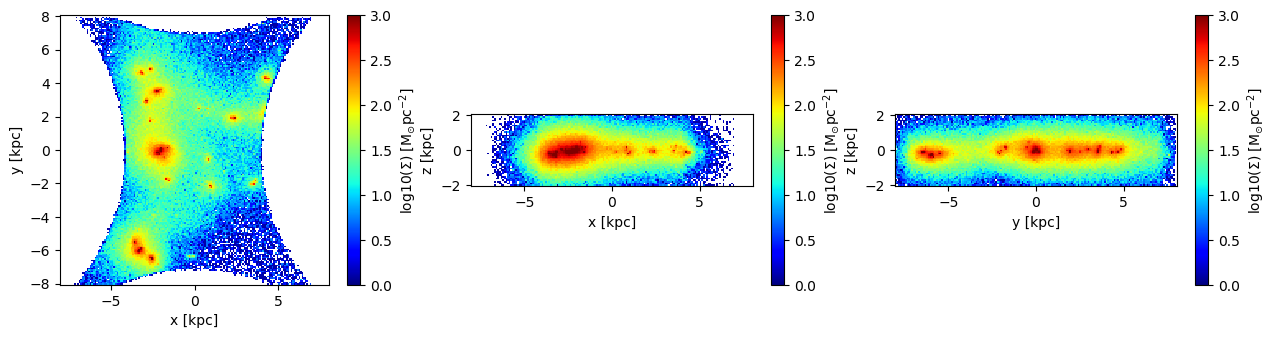

In [55]:
figure(figsize=(15.5, 3.5))
labeltext=L"\mathrm{log10(\Sigma) \ [M_{\odot} pc^{-2}]}"
theta = LinRange(-pi, pi, 100)

subplot(1,3,1)
im = imshow( log10.(permutedims(proj_z.maps[:sd]) ), cmap="jet", aspect=proj_z.ratio, origin="lower", extent=proj_z.cextent, vmin=0, vmax=3)
xlabel("x [kpc]")
ylabel("y [kpc]")
cb = colorbar(im, label=labeltext)

subplot(1,3,2)
im = imshow( log10.(permutedims(proj_y.maps[:sd]) ), cmap="jet", origin="lower", extent=proj_y.cextent, vmin=0, vmax=3)
xlabel("x [kpc]")
ylabel("z [kpc]")
cb = colorbar(im, label=labeltext)

subplot(1,3,3)
im = imshow( log10.(permutedims(proj_x.maps[:sd]) ), cmap="jet", origin="lower", extent=proj_x.cextent, vmin=0, vmax=3)
xlabel("y [kpc]")
ylabel("z [kpc]")
cb = colorbar(im, label=labeltext);

## Cylindrical Shell

#### Create projections of the full box:

In [56]:
proj_z = projection(particles, :sd, unit=:Msol_pc2, center=[:boxcenter], direction=:z, lmax=8, verbose=false);
proj_y = projection(particles, :sd, unit=:Msol_pc2, center=[:boxcenter], direction=:y, lmax=8, verbose=false);
proj_x = projection(particles, :sd, unit=:Msol_pc2, center=[:boxcenter], direction=:x, lmax=8, verbose=false);

#### Cylindrical Shell: The red lines show the shell we want to cutout as a sub-region from the full data:

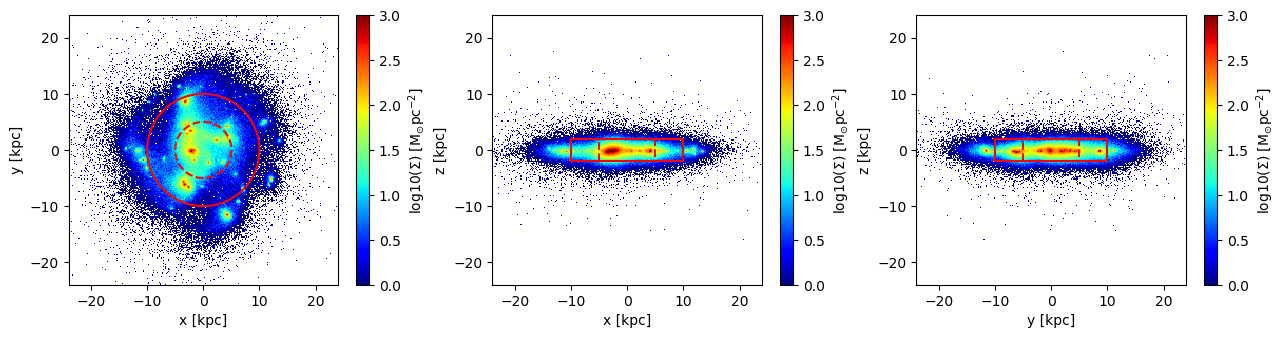

In [57]:
figure(figsize=(15.5, 3.5))
labeltext=L"\mathrm{log10(\Sigma) \ [M_{\odot} pc^{-2}]}"
theta = range(-pi, stop=pi, length=100)

subplot(1,3,1)
im = imshow( log10.( permutedims(proj_z.maps[:sd]) ), cmap="jet", aspect=proj_z.ratio, origin="lower", extent=proj_z.cextent, vmin=0, vmax=3)
plot( 10. .* sin.(theta) , 10 .* cos.(theta), color="red")
plot( 5. .* sin.(theta) , 5. .* cos.(theta), color="red", ls="--")
xlabel("x [kpc]")
ylabel("y [kpc]")
cb = colorbar(im, label=labeltext)

subplot(1,3,2)
im = imshow( log10.( permutedims(proj_y.maps[:sd]) ), cmap="jet", aspect=proj_y.ratio, origin="lower", extent=proj_y.cextent, vmin=0, vmax=3)
plot([-10.,-10.,10.,10.,-10.], [-2.,2.,2.,-2.,-2.], color="red")
plot([-5.,-5,5.,5.,-5.], [-2.,2.,2.,-2.,-2.], color="red", ls="--")
xlabel("x [kpc]")
ylabel("z [kpc]")
cb = colorbar(im, label=labeltext) 

subplot(1,3,3)
im = imshow( log10.(permutedims(proj_x.maps[:sd]) ), cmap="jet", aspect=proj_x.ratio, origin="lower", extent=proj_x.cextent, vmin=0, vmax=3)
plot([-10.,-10.,10.,10.,-10.], [-2.,2.,2.,-2.,-2.], color="red")
plot([-5.,-5,5.,5.,-5.], [-2.,2.,2.,-2.,-2.], color="red", ls="--")
xlabel("y [kpc]")
ylabel("z [kpc]")
cb = colorbar(im, label=labeltext);

#### Cylindrical Shell:
Pass the height of the cylinder and the inner/outer radius of the shell in the unit "kpc", relative to the box center [24., 24., 24.]:

In [58]:
part_subregion = shellregion( particles, :cylinder,
                                radius=[5.,10.], 
                                height=2., 
                                range_unit=:kpc, 
                                center=[:boxcenter]);

[Mera]: 2020-02-12T20:23:09.665

center: [0.5, 0.5, 0.5] ==> [24.0 [kpc] :: 24.0 [kpc] :: 24.0 [kpc]]

domain:
xmin::xmax: 0.2916667 :: 0.7083333  	==> 14.0 [kpc] :: 34.0 [kpc]
ymin::ymax: 0.2916667 :: 0.7083333  	==> 14.0 [kpc] :: 34.0 [kpc]
zmin::zmax: 0.4583333 :: 0.5416667  	==> 22.0 [kpc] :: 26.0 [kpc]

Inner radius: 5.0 [kpc]
Outer radius: 10.0 [kpc]
Radius diff: 5.0 [kpc]
Height: 2.0 [kpc]
Memory used for data table :7.282835006713867 MB
-------------------------------------------------------



In [61]:
proj_z = projection(part_subregion, :sd, unit=:Msol_pc2, center=[:boxcenter], direction=:z, lmax=8, verbose=false);
proj_y = projection(part_subregion, :sd, unit=:Msol_pc2, center=[:boxcenter], direction=:y, lmax=8, verbose=false);
proj_x = projection(part_subregion, :sd, unit=:Msol_pc2, center=[:boxcenter], direction=:x, lmax=8, verbose=false);

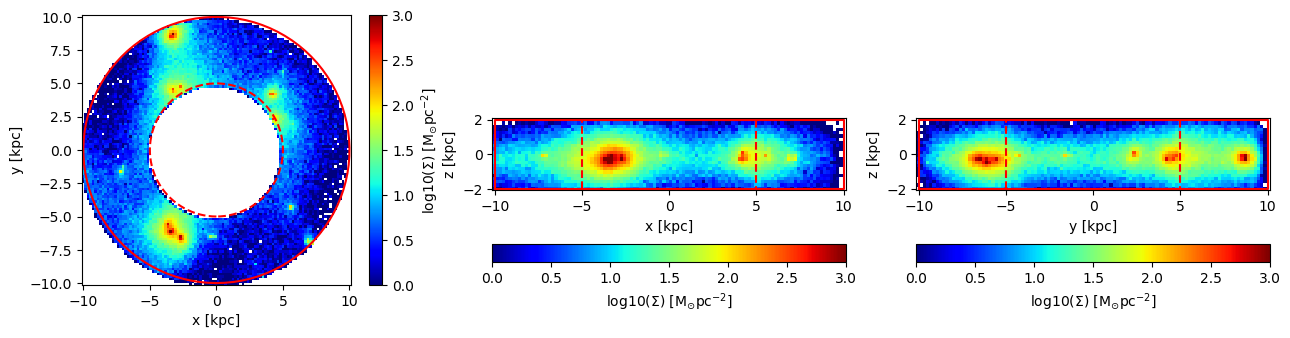

In [62]:
figure(figsize=(15.5, 3.5))
labeltext=L"\mathrm{log10(\Sigma) \ [M_{\odot} pc^{-2}]}"
theta = range(-pi, stop=pi, length=100)

subplot(1,3,1)
im = imshow( log10.( permutedims(proj_z.maps[:sd]) ), cmap="jet", aspect=proj_z.ratio, origin="lower", extent=proj_z.cextent, vmin=0, vmax=3)
plot( 10. .* sin.(theta) , 10 .* cos.(theta), color="red")
plot( 5. .* sin.(theta) , 5. .* cos.(theta), color="red", ls="--")
xlabel("x [kpc]")
ylabel("y [kpc]")
cb = colorbar(im, label=labeltext)

subplot(1,3,2)
im = imshow( log10.( permutedims(proj_y.maps[:sd]) ), cmap="jet", origin="lower", extent=proj_y.cextent, vmin=0, vmax=3)
plot([-10.,-10.,10.,10.,-10.], [-2.,2.,2.,-2.,-2.], color="red")
plot([-5.,-5,5.,5.,-5.], [-2.,2.,2.,-2.,-2.], color="red", ls="--")
xlabel("x [kpc]")
ylabel("z [kpc]")
cb = colorbar(im, orientation="horizontal", label=labeltext, pad=0.2);

subplot(1,3,3)
im = imshow( log10.( permutedims(proj_x.maps[:sd]) ), cmap="jet", origin="lower", extent=proj_x.cextent, vmin=0, vmax=3)
plot([-10.,-10.,10.,10.,-10.], [-2.,2.,2.,-2.,-2.], color="red")
plot([-5.,-5,5.,5.,-5.], [-2.,2.,2.,-2.,-2.], color="red", ls="--")
xlabel("y [kpc]")
ylabel("z [kpc]")
cb = colorbar(im, orientation="horizontal", label=labeltext, pad=0.2);

#### Cylindrical Shell: Get the data outside of the selected shell (inverse selection):

In [63]:
part_subregion = shellregion( particles, :cylinder,
                                radius=[5.,10.], 
                                height=2., 
                                range_unit=:kpc, 
                                center=[:boxcenter],
                                inverse=true);

[Mera]: 2020-02-12T20:23:29.982

center: [0.5, 0.5, 0.5] ==> [24.0 [kpc] :: 24.0 [kpc] :: 24.0 [kpc]]

domain:
xmin::xmax: 0.2916667 :: 0.7083333  	==> 14.0 [kpc] :: 34.0 [kpc]
ymin::ymax: 0.2916667 :: 0.7083333  	==> 14.0 [kpc] :: 34.0 [kpc]
zmin::zmax: 0.4583333 :: 0.5416667  	==> 22.0 [kpc] :: 26.0 [kpc]

Inner radius: 5.0 [kpc]
Outer radius: 10.0 [kpc]
Radius diff: 5.0 [kpc]
Height: 2.0 [kpc]
Memory used for data table :12.133260726928711 MB
-------------------------------------------------------



In [64]:
proj_z = projection(part_subregion, :sd, unit=:Msol_pc2, center=[:boxcenter], direction=:z, lmax=8, verbose=false);
proj_y = projection(part_subregion, :sd, unit=:Msol_pc2, center=[:boxcenter], direction=:y, lmax=8, verbose=false);
proj_x = projection(part_subregion, :sd, unit=:Msol_pc2, center=[:boxcenter], direction=:x, lmax=8, verbose=false);

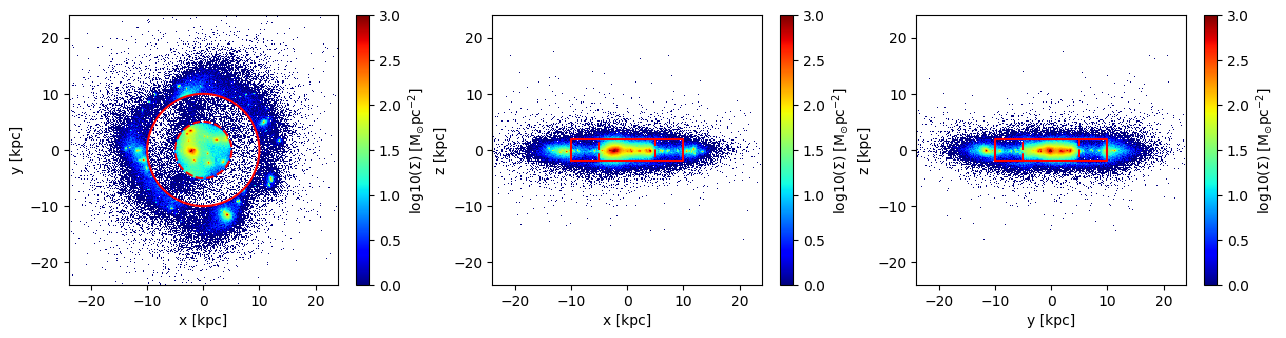

In [65]:
figure(figsize=(15.5, 3.5))
labeltext=L"\mathrm{log10(\Sigma) \ [M_{\odot} pc^{-2}]}"
theta = range(-pi, stop=pi, length=100)

subplot(1,3,1)
im = imshow( log10.( permutedims(proj_z.maps[:sd]) ), cmap="jet", aspect=proj_z.ratio, origin="lower", extent=proj_z.cextent, vmin=0, vmax=3)
plot( 10. .* sin.(theta) , 10 .* cos.(theta), color="red")
plot( 5. .* sin.(theta) , 5. .* cos.(theta), color="red", ls="--")
xlabel("x [kpc]")
ylabel("y [kpc]")
cb = colorbar(im, label=labeltext)

subplot(1,3,2)
im = imshow( log10.( permutedims(proj_y.maps[:sd]) ), cmap="jet", aspect=proj_y.ratio, origin="lower", extent=proj_y.cextent, vmin=0, vmax=3)
plot([-10.,-10.,10.,10.,-10.], [-2.,2.,2.,-2.,-2.], color="red")
plot([-5.,-5,5.,5.,-5.], [-2.,2.,2.,-2.,-2.], color="red", ls="--")
xlabel("x [kpc]")
ylabel("z [kpc]")
cb = colorbar(im, label=labeltext) 

subplot(1,3,3)
im = imshow( log10.( permutedims(proj_x.maps[:sd]) ), cmap="jet", aspect=proj_x.ratio, origin="lower", extent=proj_x.cextent, vmin=0, vmax=3)
plot([-10.,-10.,10.,10.,-10.], [-2.,2.,2.,-2.,-2.], color="red")
plot([-5.,-5,5.,5.,-5.], [-2.,2.,2.,-2.,-2.], color="red", ls="--")
xlabel("y [kpc]")
ylabel("z [kpc]")
cb = colorbar(im, label=labeltext);

<a id="ShellRegionSphere"></a>

## Spherical Shell
#### Create projections of the full box:

In [66]:
proj_z = projection(particles, :sd, unit=:Msol_pc2, center=[:boxcenter], direction=:z, lmax=8, verbose=false);
proj_y = projection(particles, :sd, unit=:Msol_pc2, center=[:boxcenter], direction=:y, lmax=8, verbose=false);
proj_x = projection(particles, :sd, unit=:Msol_pc2, center=[:boxcenter], direction=:x, lmax=8, verbose=false);

#### Spherical Shell: The red lines show the shell that we want to cutout as a sub-region from the full data:

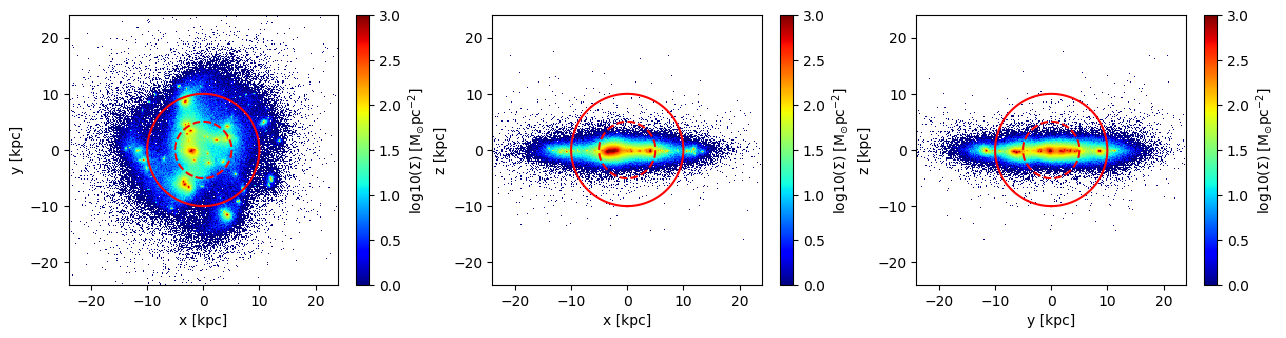

In [67]:
figure(figsize=(15.5, 3.5))
labeltext=L"\mathrm{log10(\Sigma) \ [M_{\odot} pc^{-2}]}"
theta = range(-pi, stop=pi, length=100)

subplot(1,3,1)
im = imshow( log10.( permutedims(proj_z.maps[:sd]) ), cmap="jet", aspect=proj_z.ratio, origin="lower", extent=proj_z.cextent, vmin=0, vmax=3)
plot( 10. .* sin.(theta) , 10 .* cos.(theta), color="red")
plot( 5. .* sin.(theta) , 5. .* cos.(theta), color="red", ls="--")
xlabel("x [kpc]")
ylabel("y [kpc]")
cb = colorbar(im, label=labeltext)

subplot(1,3,2)
im = imshow( log10.( permutedims(proj_y.maps[:sd]) ), cmap="jet", aspect=proj_y.ratio, origin="lower", extent=proj_y.cextent, vmin=0, vmax=3)
plot( 10. .* sin.(theta) , 10 .* cos.(theta), color="red")
plot( 5. .* sin.(theta) , 5. .* cos.(theta), color="red", ls="--")
xlabel("x [kpc]")
ylabel("z [kpc]")
cb = colorbar(im, label=labeltext)

subplot(1,3,3)
im = imshow( log10.( permutedims(proj_x.maps[:sd]) ), cmap="jet", aspect=proj_x.ratio, origin="lower", extent=proj_x.cextent, vmin=0, vmax=3)
plot( 10. .* sin.(theta) , 10 .* cos.(theta), color="red")
plot( 5. .* sin.(theta) , 5. .* cos.(theta), color="red",ls="--")
xlabel("y [kpc]")
ylabel("z [kpc]")
cb = colorbar(im, label=labeltext);

#### Spherical Shell: 
Select the inner and outer radius of the spherical shell in unit "kpc", relative to the box center [24., 24., 24.]:

In [68]:
part_subregion = shellregion( particles, :sphere,
                                radius=[5.,10.],
                                range_unit=:kpc, 
                                center=[24.,24.,24.]);

[Mera]: 2020-02-12T20:23:51.297

center: [0.5, 0.5, 0.5] ==> [24.0 [kpc] :: 24.0 [kpc] :: 24.0 [kpc]]

domain:
xmin::xmax: 0.2916667 :: 0.7083333  	==> 14.0 [kpc] :: 34.0 [kpc]
ymin::ymax: 0.2916667 :: 0.7083333  	==> 14.0 [kpc] :: 34.0 [kpc]
zmin::zmax: 0.2916667 :: 0.7083333  	==> 14.0 [kpc] :: 34.0 [kpc]

Inner radius: 5.0 [kpc]
Outer radius: 10.0 [kpc]
Radius diff: 5.0 [kpc]
Memory used for data table :7.592016220092773 MB
-------------------------------------------------------



#### Spherical Shell: Projections of the shell-region. 
The coordinates center is the center of the box:

In [69]:
proj_z = projection(part_subregion, :sd, unit=:Msol_pc2, center=[:boxcenter], direction=:z, lmax=8, verbose=false);
proj_y = projection(part_subregion, :sd, unit=:Msol_pc2, center=[:boxcenter], direction=:y, lmax=8, verbose=false);
proj_x = projection(part_subregion, :sd, unit=:Msol_pc2, center=[:boxcenter], direction=:x, lmax=8, verbose=false);

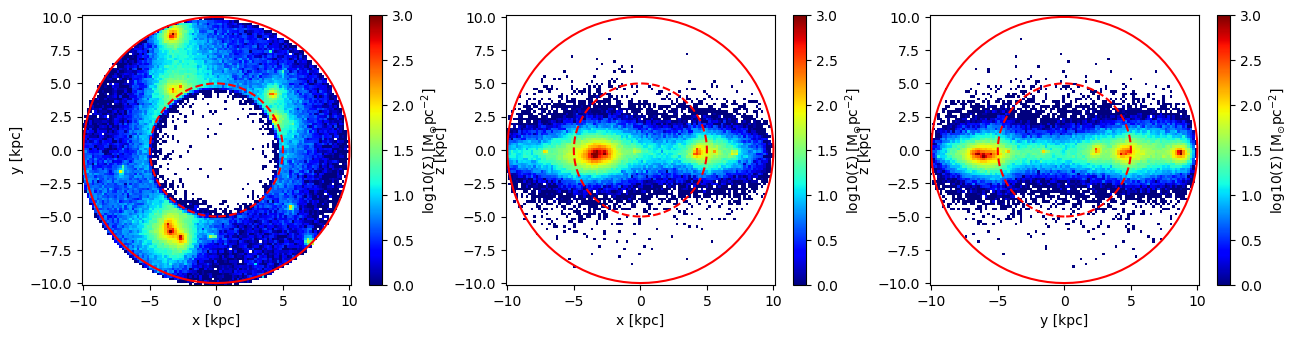

In [70]:
figure(figsize=(15.5, 3.5))
labeltext=L"\mathrm{log10(\Sigma) \ [M_{\odot} pc^{-2}]}"
theta = range(-pi, stop=pi, length=100)

subplot(1,3,1)
im = imshow( log10.( permutedims(proj_z.maps[:sd]) ), cmap="jet", aspect=proj_z.ratio, origin="lower", extent=proj_z.cextent, vmin=0, vmax=3)
plot( 10. .* sin.(theta) , 10 .* cos.(theta), color="red")
plot( 5. .* sin.(theta) , 5. .* cos.(theta), color="red", ls="--")
xlabel("x [kpc]")
ylabel("y [kpc]")
cb = colorbar(im, label=labeltext)

subplot(1,3,2)
im = imshow( log10.( permutedims(proj_y.maps[:sd]) ), cmap="jet", aspect=proj_y.ratio, origin="lower", extent=proj_y.cextent, vmin=0, vmax=3)
plot( 10. .* sin.(theta) , 10 .* cos.(theta), color="red")
plot( 5. .* sin.(theta) , 5. .* cos.(theta), color="red",ls="--")
xlabel("x [kpc]")
ylabel("z [kpc]")
cb = colorbar(im, label=labeltext); 

subplot(1,3,3)
im = imshow( log10.( permutedims(proj_x.maps[:sd]) ), cmap="jet", aspect=proj_x.ratio, origin="lower", extent=proj_x.cextent, vmin=0, vmax=3)
plot( 10. .* sin.(theta) , 10 .* cos.(theta), color="red")
plot( 5. .* sin.(theta) , 5. .* cos.(theta), color="red",ls="--")
xlabel("y [kpc]")
ylabel("z [kpc]")
cb = colorbar(im, label=labeltext);

#### Spherical Shell: Get the data outside of the selected shell-region (inverse selection):

In [71]:
part_subregion = shellregion( particles, :sphere,
                                radius=[5.,10.],
                                range_unit=:kpc, 
                                center=[:boxcenter], 
                                inverse=true);

[Mera]: 2020-02-12T20:24:13.472

center: [0.5, 0.5, 0.5] ==> [24.0 [kpc] :: 24.0 [kpc] :: 24.0 [kpc]]

domain:
xmin::xmax: 0.2916667 :: 0.7083333  	==> 14.0 [kpc] :: 34.0 [kpc]
ymin::ymax: 0.2916667 :: 0.7083333  	==> 14.0 [kpc] :: 34.0 [kpc]
zmin::zmax: 0.2916667 :: 0.7083333  	==> 14.0 [kpc] :: 34.0 [kpc]

Inner radius: 5.0 [kpc]
Outer radius: 10.0 [kpc]
Radius diff: 5.0 [kpc]
Memory used for data table :11.824079513549805 MB
-------------------------------------------------------



In [72]:
proj_z = projection(part_subregion, :sd, unit=:Msol_pc2, center=[:boxcenter], direction=:z, lmax=8, verbose=false);
proj_y = projection(part_subregion, :sd, unit=:Msol_pc2, center=[:boxcenter], direction=:y, lmax=8, verbose=false);
proj_x = projection(part_subregion, :sd, unit=:Msol_pc2, center=[:boxcenter], direction=:x, lmax=8, verbose=false);

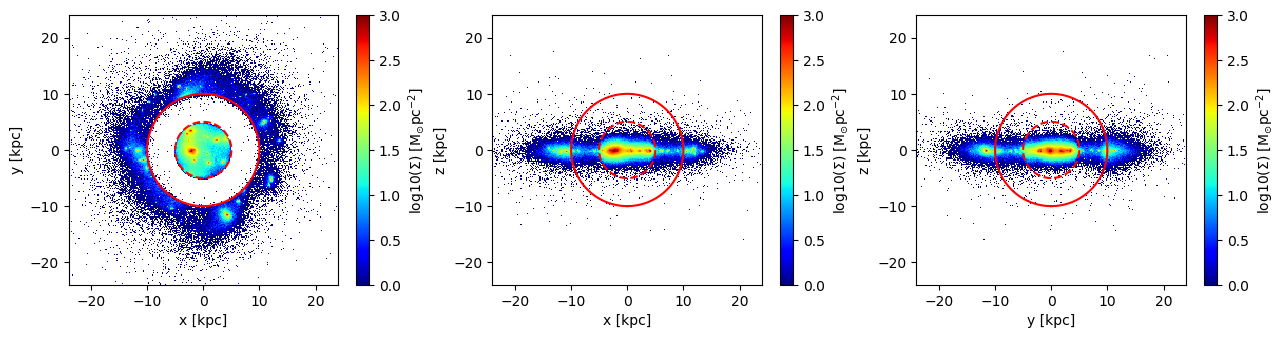

In [73]:
figure(figsize=(15.5, 3.5))
labeltext=L"\mathrm{log10(\Sigma) \ [M_{\odot} pc^{-2}]}"
theta = range(-pi, stop=pi, length=100)

subplot(1,3,1)
im = imshow( log10.( permutedims(proj_z.maps[:sd]) ), cmap="jet", aspect=proj_z.ratio, origin="lower", extent=proj_z.cextent, vmin=0, vmax=3)
plot( 10. .* sin.(theta) , 10 .* cos.(theta), color="red")
plot( 5. .* sin.(theta) , 5. .* cos.(theta), color="red", ls="--")
xlabel("x [kpc]")
ylabel("y [kpc]")
cb = colorbar(im, label=labeltext)

subplot(1,3,2)
im = imshow( log10.( permutedims(proj_y.maps[:sd]) ), cmap="jet", aspect=proj_y.ratio, origin="lower", extent=proj_y.cextent, vmin=0, vmax=3)
plot( 10. .* sin.(theta) , 10 .* cos.(theta), color="red")
plot( 5. .* sin.(theta) , 5. .* cos.(theta), color="red", ls="--")
xlabel("x [kpc]")
ylabel("z [kpc]")
cb = colorbar(im, label=labeltext) 

subplot(1,3,3)
im = imshow( log10.( permutedims(proj_x.maps[:sd]) ), cmap="jet", aspect=proj_x.ratio, origin="lower", extent=proj_x.cextent, vmin=0, vmax=3)
plot( 10. .* sin.(theta) , 10 .* cos.(theta), color="red")
plot( 5. .* sin.(theta) , 5. .* cos.(theta), color="red", ls="--")
xlabel("y [kpc]")
ylabel("z [kpc]")
cb = colorbar(im, label=labeltext);